# Cluster hierárquico
# 01 - Passo: Instalando os pacotes

In [1]:
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install seaborn
# pip install plotly
# pip install scipy
# pip install scikit-learn
# pip install pingouin

# 02 - Passo: Importando os pacotes

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'

# 03 - Passos: Importando o banco de dados

In [3]:
dados_vest = pd.read_excel('vestibular.xlsx')

### 03.1 - Passos: Informações dos DataSet

In [4]:
print("=========================================================================")
print("Formato do dataset (linhas, colunas):\n", dados_vest.shape)
print("=========================================================================")

Formato do dataset (linhas, colunas):
 (5, 4)


In [5]:
print("=========================================================================")
print("\nPrimeiras observações do dataset:\n",dados_vest.head())
print("=========================================================================")


Primeiras observações do dataset:
      estudante  matemática  física  química
0     Gabriela         3.7     2.7      9.1
1  Luiz Felipe         7.8     8.0      1.5
2     Patrícia         8.9     1.0      2.7
3       Ovídio         7.0     1.0      9.0
4       Leonor         3.4     2.0      5.0


In [6]:
print("=========================================================================")
print("\nInformações gerais do dataset:\n",dados_vest.info())
print("=========================================================================")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estudante   5 non-null      object 
 1   matemática  5 non-null      float64
 2   física      5 non-null      float64
 3   química     5 non-null      float64
dtypes: float64(3), object(1)
memory usage: 292.0+ bytes

Informações gerais do dataset:
 None


In [7]:
print("=========================================================================")
print("\nResumo estatístico das colunas numéricas:\n",dados_vest.describe())
print("=========================================================================")


Resumo estatístico das colunas numéricas:
        matemática    física   química
count    5.000000  5.000000  5.000000
mean     6.160000  2.940000  5.460000
std      2.478508  2.918561  3.510413
min      3.400000  1.000000  1.500000
25%      3.700000  1.000000  2.700000
50%      7.000000  2.000000  5.000000
75%      7.800000  2.700000  9.000000
max      8.900000  8.000000  9.100000


In [8]:
print("=========================================================================")
print("\nQuantidade de valores nulos por coluna:\n",dados_vest.isnull().sum())
print("=========================================================================")


Quantidade de valores nulos por coluna:
 estudante     0
matemática    0
física        0
química       0
dtype: int64


In [9]:
print("=========================================================================")
print("\nQuantidade de linhas duplicadas:\n",dados_vest.duplicated().sum())
print("=========================================================================")


Quantidade de linhas duplicadas:
 0


### 03.2 - Passos: Gráfico 3D das observações

In [10]:
fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    text=dados_vest.estudante)

fig.write_html('vest_inicial.html')

Visualizando o grafico, observamos que Patricia e Luiz Felipe está isolado dos outros usuarios.

# 🧹 04 - Passo: padronizar os dados (ZScore)
### NESSE EXEMPLO NÃO SERÁ NECESSARIO ESSA PADRONIZAÇÃO, POIS TODAS AS VARIAVEIS SEGUEM O MESMO PADRAO, NOTAS DE 0 A 10.

Se as variáveis têm unidades diferentes (kg, metro, reais…), é necessário padronizar.

💡 Por quê?

Para que nenhuma variável “grite mais alto”.

📌 Analogia: Comparar altura (em metros) com peso (em quilos) sem padronizar é como comparar:

	•	1,70

	•	87

Sem padronizar, o algoritmo acha que 87 > 1,70, quando na verdade são coisas diferentes.

### Base Antes da Padronização

In [11]:
dados_vest

,estudante,matemática,física,química
0,Gabriela,3.7,2.7,9.1
1,Luiz Felipe,7.8,8.0,1.5
2,Patrícia,8.9,1.0,2.7
3,Ovídio,7.0,1.0,9.0
4,Leonor,3.4,2.0,5.0


### Selecionado apenas variáveis métricas da Base

In [12]:
vest = dados_vest.drop(columns=['estudante'])
vest

,matemática,física,química
0,3.7,2.7,9.1
1,7.8,8.0,1.5
2,8.9,1.0,2.7
3,7.0,1.0,9.0
4,3.4,2.0,5.0


### Verificando se há necessidade da padronização do Z Score
### Boxplot com as três variáveis originais, apaenas para no visual verificarmos que as mesmas estão na mesma escala, e nesse caso está, logo não ha necessidade da programação das variaveis.

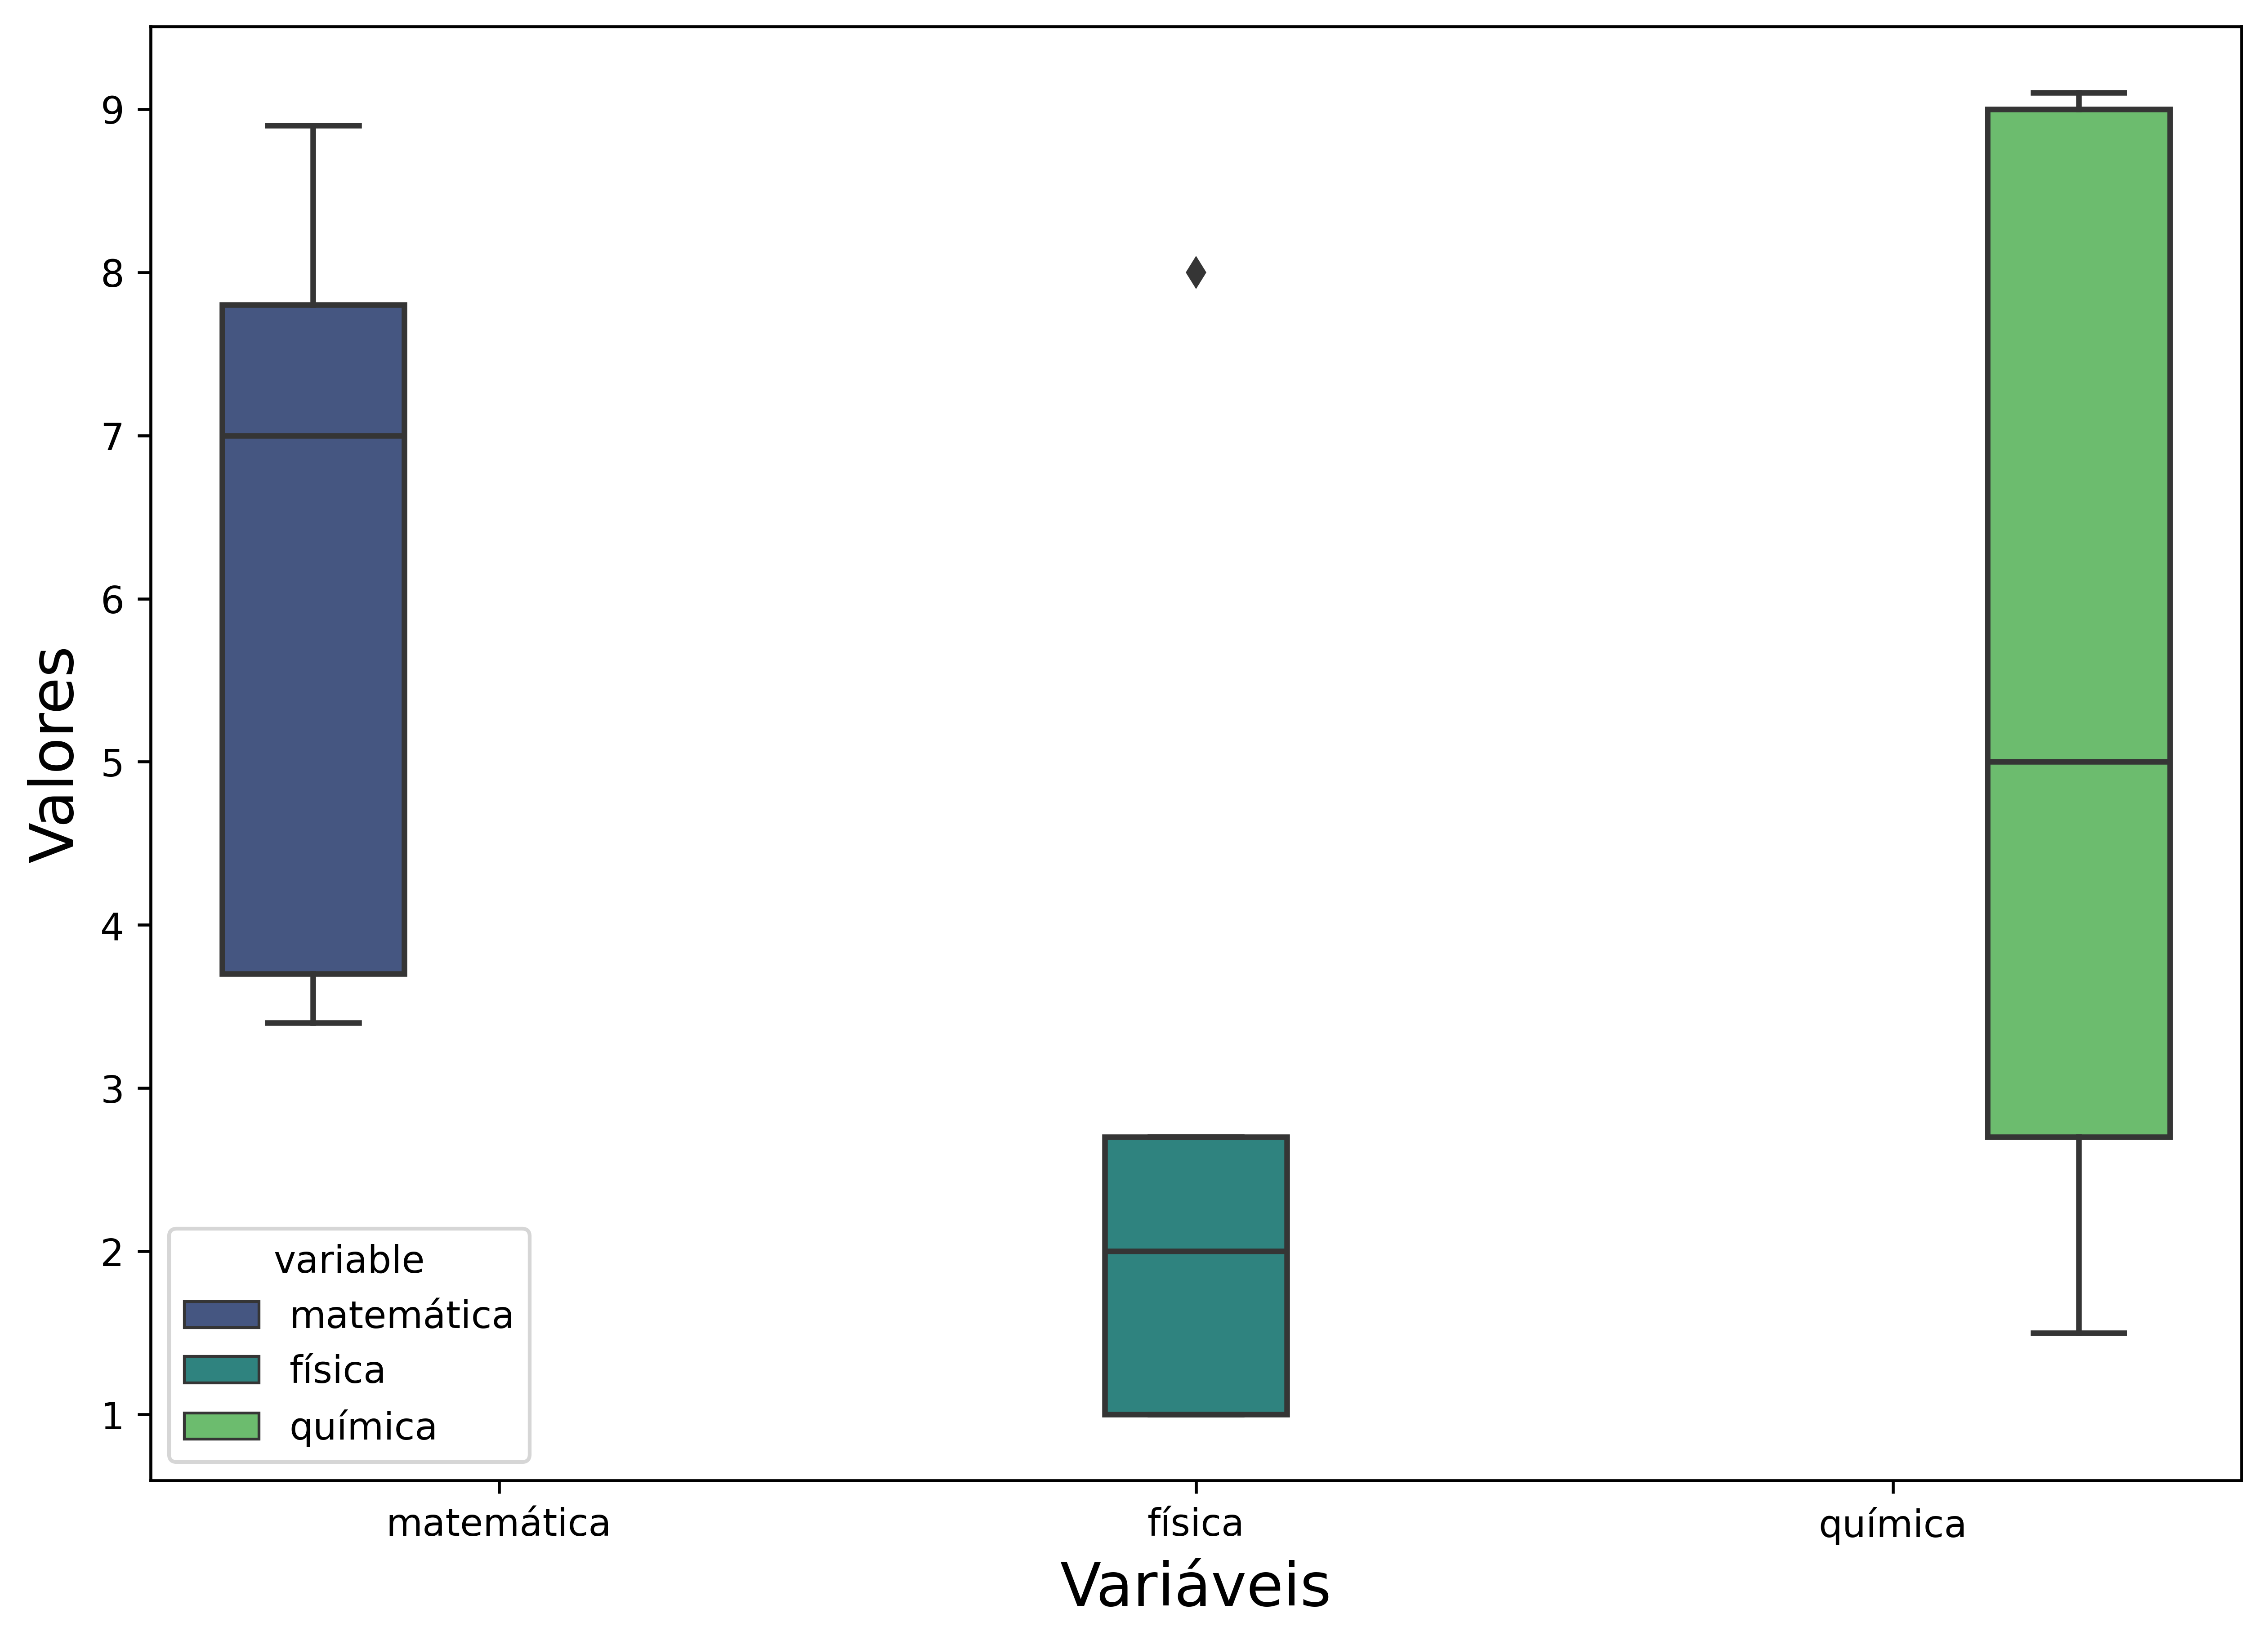

In [13]:
plt.figure(figsize=(10,7), dpi=600)
sns.boxplot(x='variable', y='value', data=pd.melt(vest), hue='variable', palette='viridis')
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

# O gráfico ilustra que não é necessária a padronização neste caso

### 🔵 MATEMÁTICA
	•	A caixa é bem alta → mostra muita variação nas notas.

	•	Mediana ≈ 7 (linha dentro da caixa)
	
	•	Valores vão de aproximadamente 3.5 a 9
	
	•	Distribuição alta → alunos com notas bem diferentes entre si

📌 Matemática tem a maior variação entre os alunos.


### 🟦 FÍSICA
	
	•	Caixa muito baixa e comprimida
	
	•	Mediana ≈ 2
	
	•	Notas vão de 1 a 3
	
	•	Tem um outlier perto de 8 (ponto preto isolado)

📌 Física é a disciplina com menor variação, quase todos os alunos tiraram notas baixas e parecidas.

📌 Mas existe um aluno com nota extremamente maior (8), que virou outlier.

### 🟩 QUÍMICA

	•	Caixa também bem alta (como matemática) → grande variação

	•	Mediana ≈ 5

	•	Notas vão de 1.5 a 9

	•	Parece haver dispersão ampla

📌 Química também tem alta variação — alunos vão de muito mal a muito bem.

### Aplicando o procedimento de ZScore (CASO NECESSARIO)
Deixo todas as variaveis com média "0" e desvio padrao igual a "1"

In [14]:
vest_pad = vest.apply(zscore, ddof=1)
vest_pad

,matemática,física,química
0,-0.992533,-0.082232,1.036915
1,0.661689,1.733731,-1.128072
2,1.105504,-0.664711,-0.786232
3,0.338914,-0.664711,1.008428
4,-1.113573,-0.322076,-0.131039


### Visualizando o resultado do procedimento na média e desvio padrão, apos a padronização do Z Score

In [15]:
print("=========================================================================")
print("Media das Variaveis Metricas")
print("=========================================================================")
print(round(vest_pad.mean(), 2))
print("\n=========================================================================")
print("Devio Padrão das Variaveis Metricas")
print("=========================================================================")
print(round(vest_pad.std(), 2))

Media das Variaveis Metricas
matemática    0.0
física        0.0
química      -0.0
dtype: float64

Devio Padrão das Variaveis Metricas
matemática    1.0
física        1.0
química       1.0
dtype: float64


# 📌 Como Entendemos que não ha necessidade de usar os banco de dados padronizado no ZScore "vest_pad" usaremos o não padronizado "vest".

# 🧹 05 - Passo: Distâncias (Medida de dissimilaridade)

Clustering precisa medir “quão distante” duas coisas são.

É como medir o quanto duas pessoas se parecem.


As principais distâncias:

- Euclidiana: Distância “reta”

    Analogia: distância entre duas cidades no mapa.

- Manhattan: Anda sempre “em linhas retas” (quadras).

    Analogia: andar em Manhattan, seguindo ruas retas.

- Chebychev: Considera apenas a maior diferença entre as variáveis.

- sqeuclidean

- cityblock

- canberra

- correlation

### Criando o dataset "dist_euclidiana", apenas para verificar a matriz com os valores

In [16]:
# Cluster hierárquico aglomerativo: distância euclidiana + single linkage
# Visualizando as distâncias

dist_euclidiana = pdist(vest, metric='euclidean')

### A - Gerando o dendrograma
### Distância "euclidiana" e método de encadeamento "single linkage"

In [17]:
### Ecolha de 3 cluster foi pelo analista, isso vai ser impresso no dendrograma

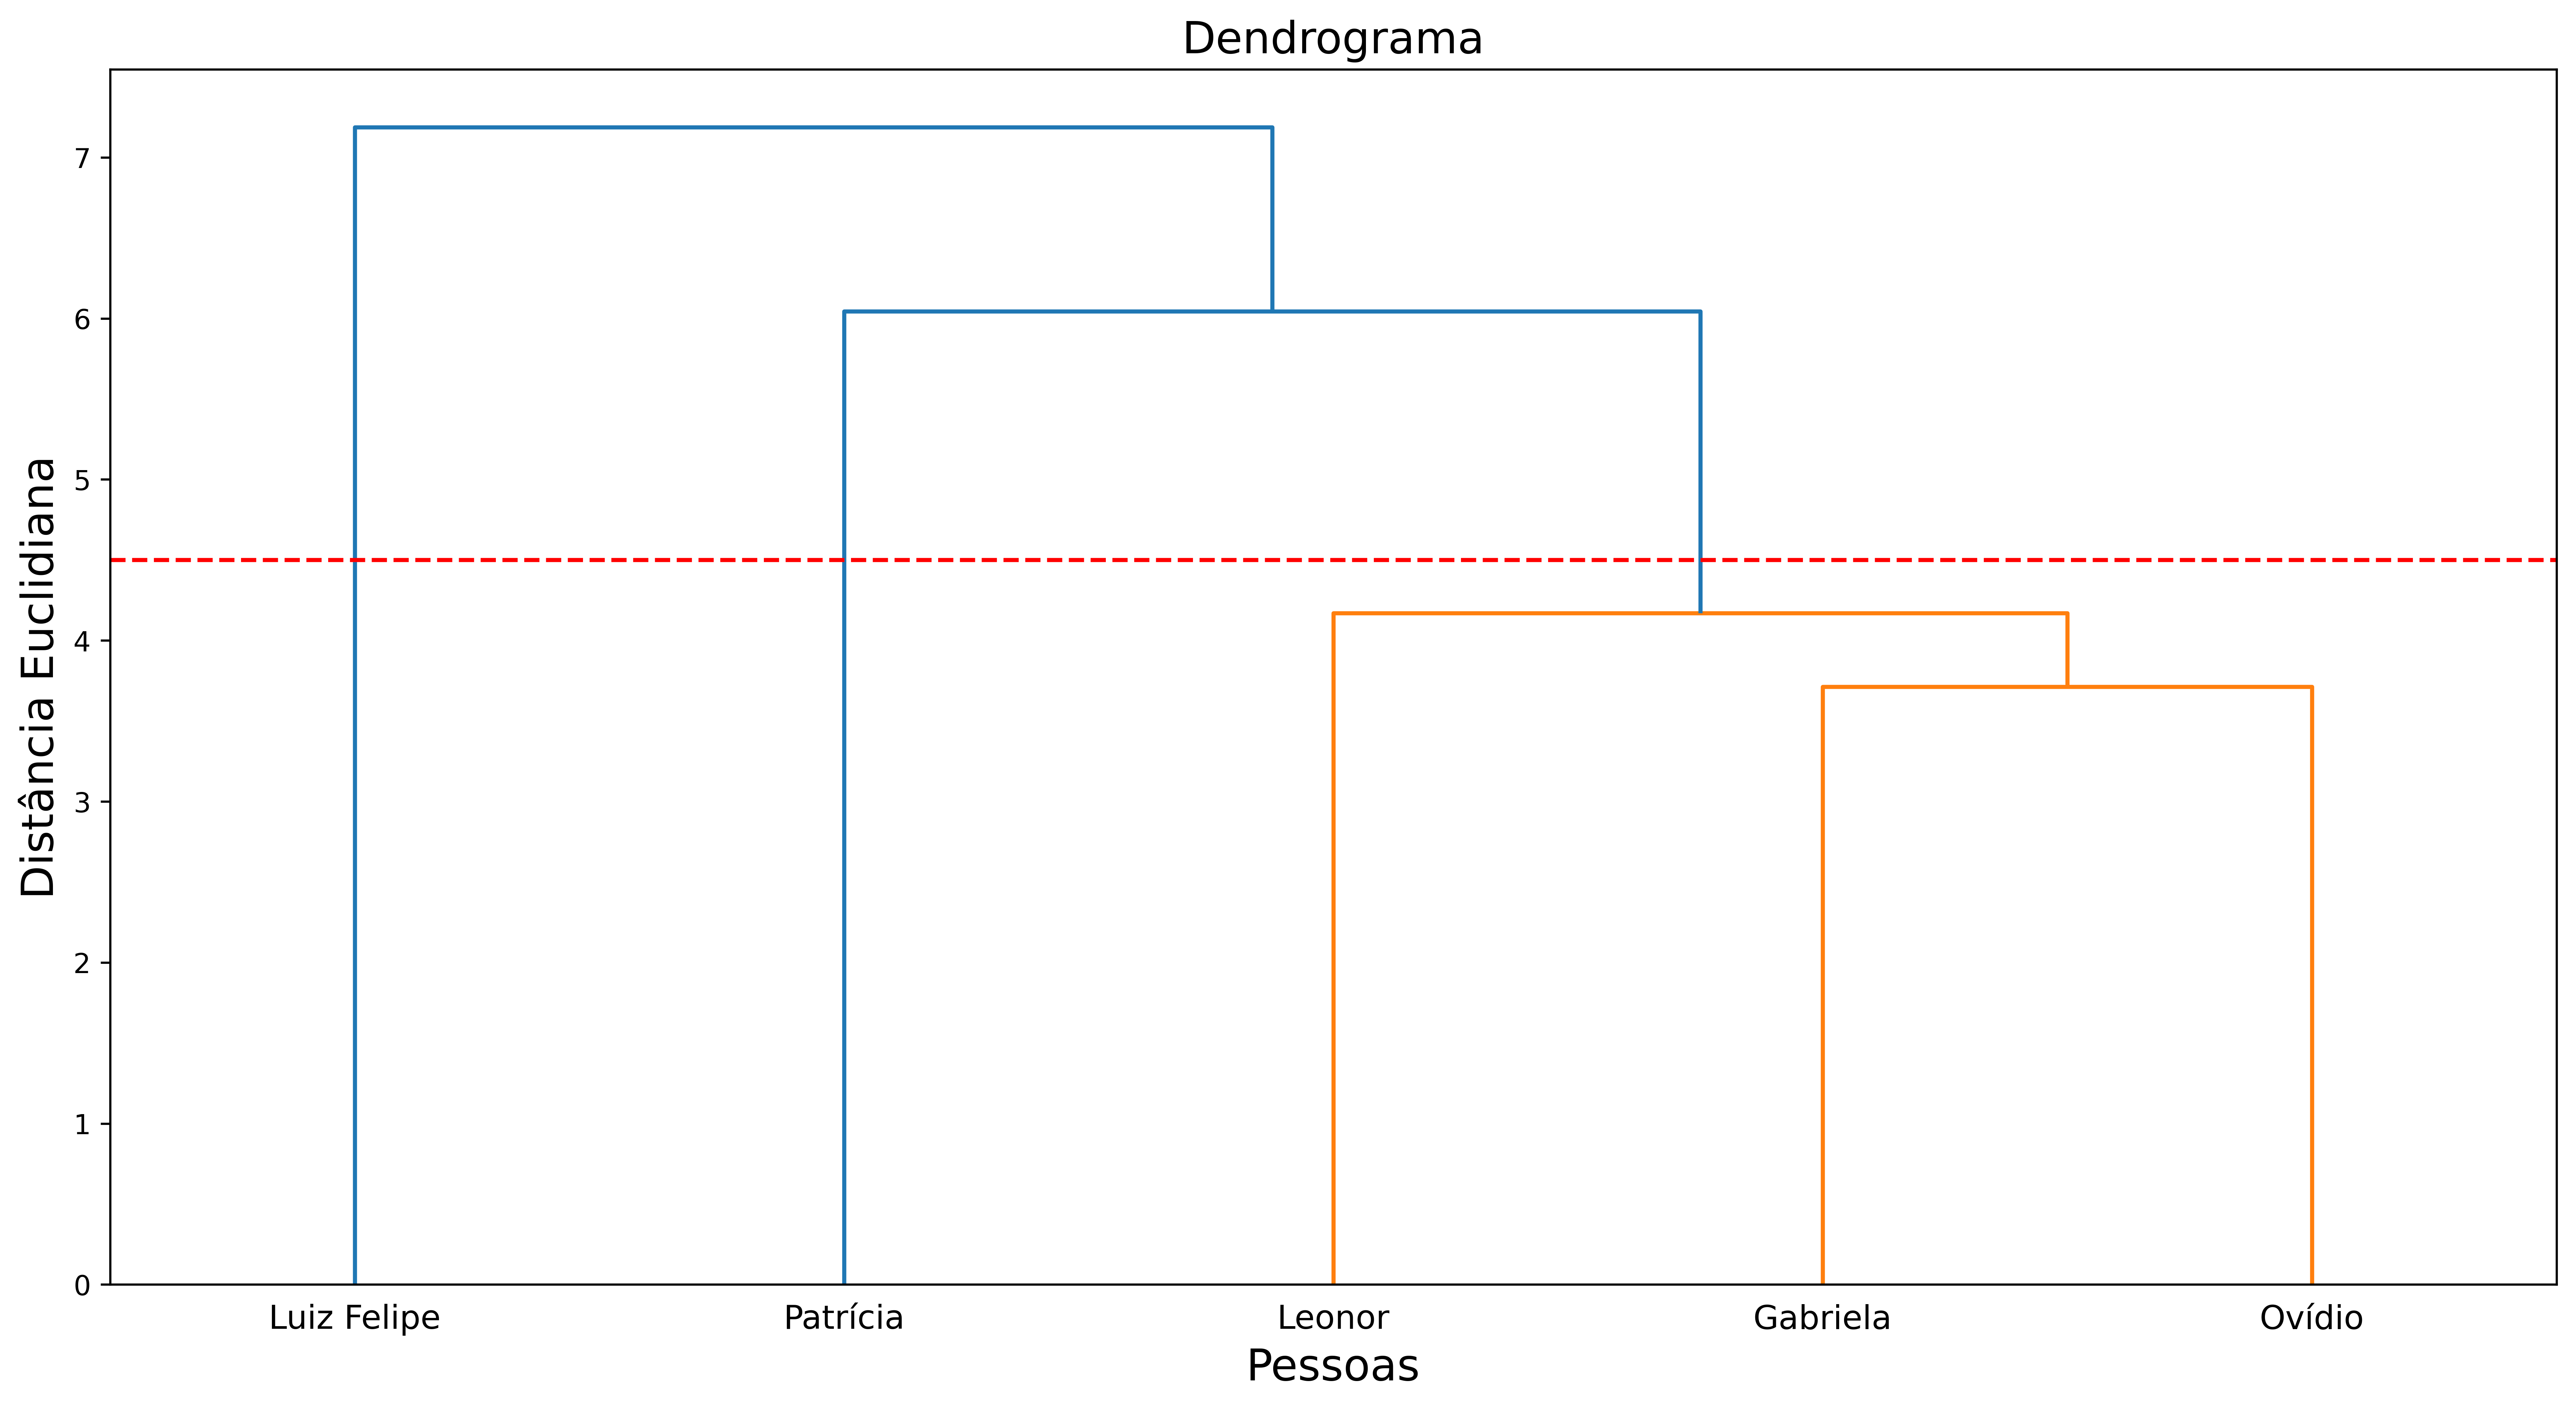

In [18]:
plt.figure(figsize=(16,8), dpi=600)
# Objeto que contem a Clusterização
dend_sing = sch.linkage(vest, method = 'single', metric = 'euclidean') 
# Gera o dendrograma
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
# Escolhi gerar a linha no 4.5, onde no caso gera 3 clusters
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean
    ## cityblock
    ## chebyshev
    ## canberra
    ## correlation

# Gerando a variável com a indicação do cluster no dataset

## Deve ser realizada a seguinte parametrização:
    ## Número de clusters (n_clusters)
    ## Medida de distância (metric)
    ## Método de encadeamento (linkage)
    
# Como já observamos 3 clusters no dendrograma, vamos selecionar "3" clusters
# A medida de distância e o método de encadeamento são mantidos

In [19]:
# Coeficientes do esquema hierárquico de aglomeração (single)
# Ponto de cruzamentos
coef_single = [y[1] for y in dendrogram_s['dcoord']]
print(coef_single)

[3.713488925525428, 4.170131892398609, 6.044832503882965, 7.1867934435323795]


#### Depois de Analisar,entendemos que teremos 3 clusters

1 - Cluster criado pelos alunos: 
- Leonor
- Gabriela
- Ovídio

2 - Cluster criado: Patrícia

3 - Cluster criado: Luiz Felipe

#### Mas ate agora, só temos uma informação grafica


## Gerando a variável com a indicação do cluster no dataset

In [20]:

## Deve ser realizada a seguinte parametrização:
    ## Número de clusters (n_clusters)
    ## Medida de distância (metric)
    ## Método de encadeamento (linkage)
    
# Como já observamos 3 clusters no dendrograma, vamos selecionar "3" clusters
# A medida de distância e o método de encadeamento são mantidos

cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(vest)
dados_vest['cluster_single'] = indica_cluster_sing
dados_vest['cluster_single'] = dados_vest['cluster_single'].astype('category')



#### Mostrando a Base "dados_vest" com o cluster "cluster_sing"

In [21]:
dados_vest

,estudante,matemática,física,química,cluster_single
0,Gabriela,3.7,2.7,9.1,0
1,Luiz Felipe,7.8,8.0,1.5,1
2,Patrícia,8.9,1.0,2.7,2
3,Ovídio,7.0,1.0,9.0,0
4,Leonor,3.4,2.0,5.0,0


### B - Gerando o dendrograma
### Distância "euclidiana" e método de encadeamento "complete"

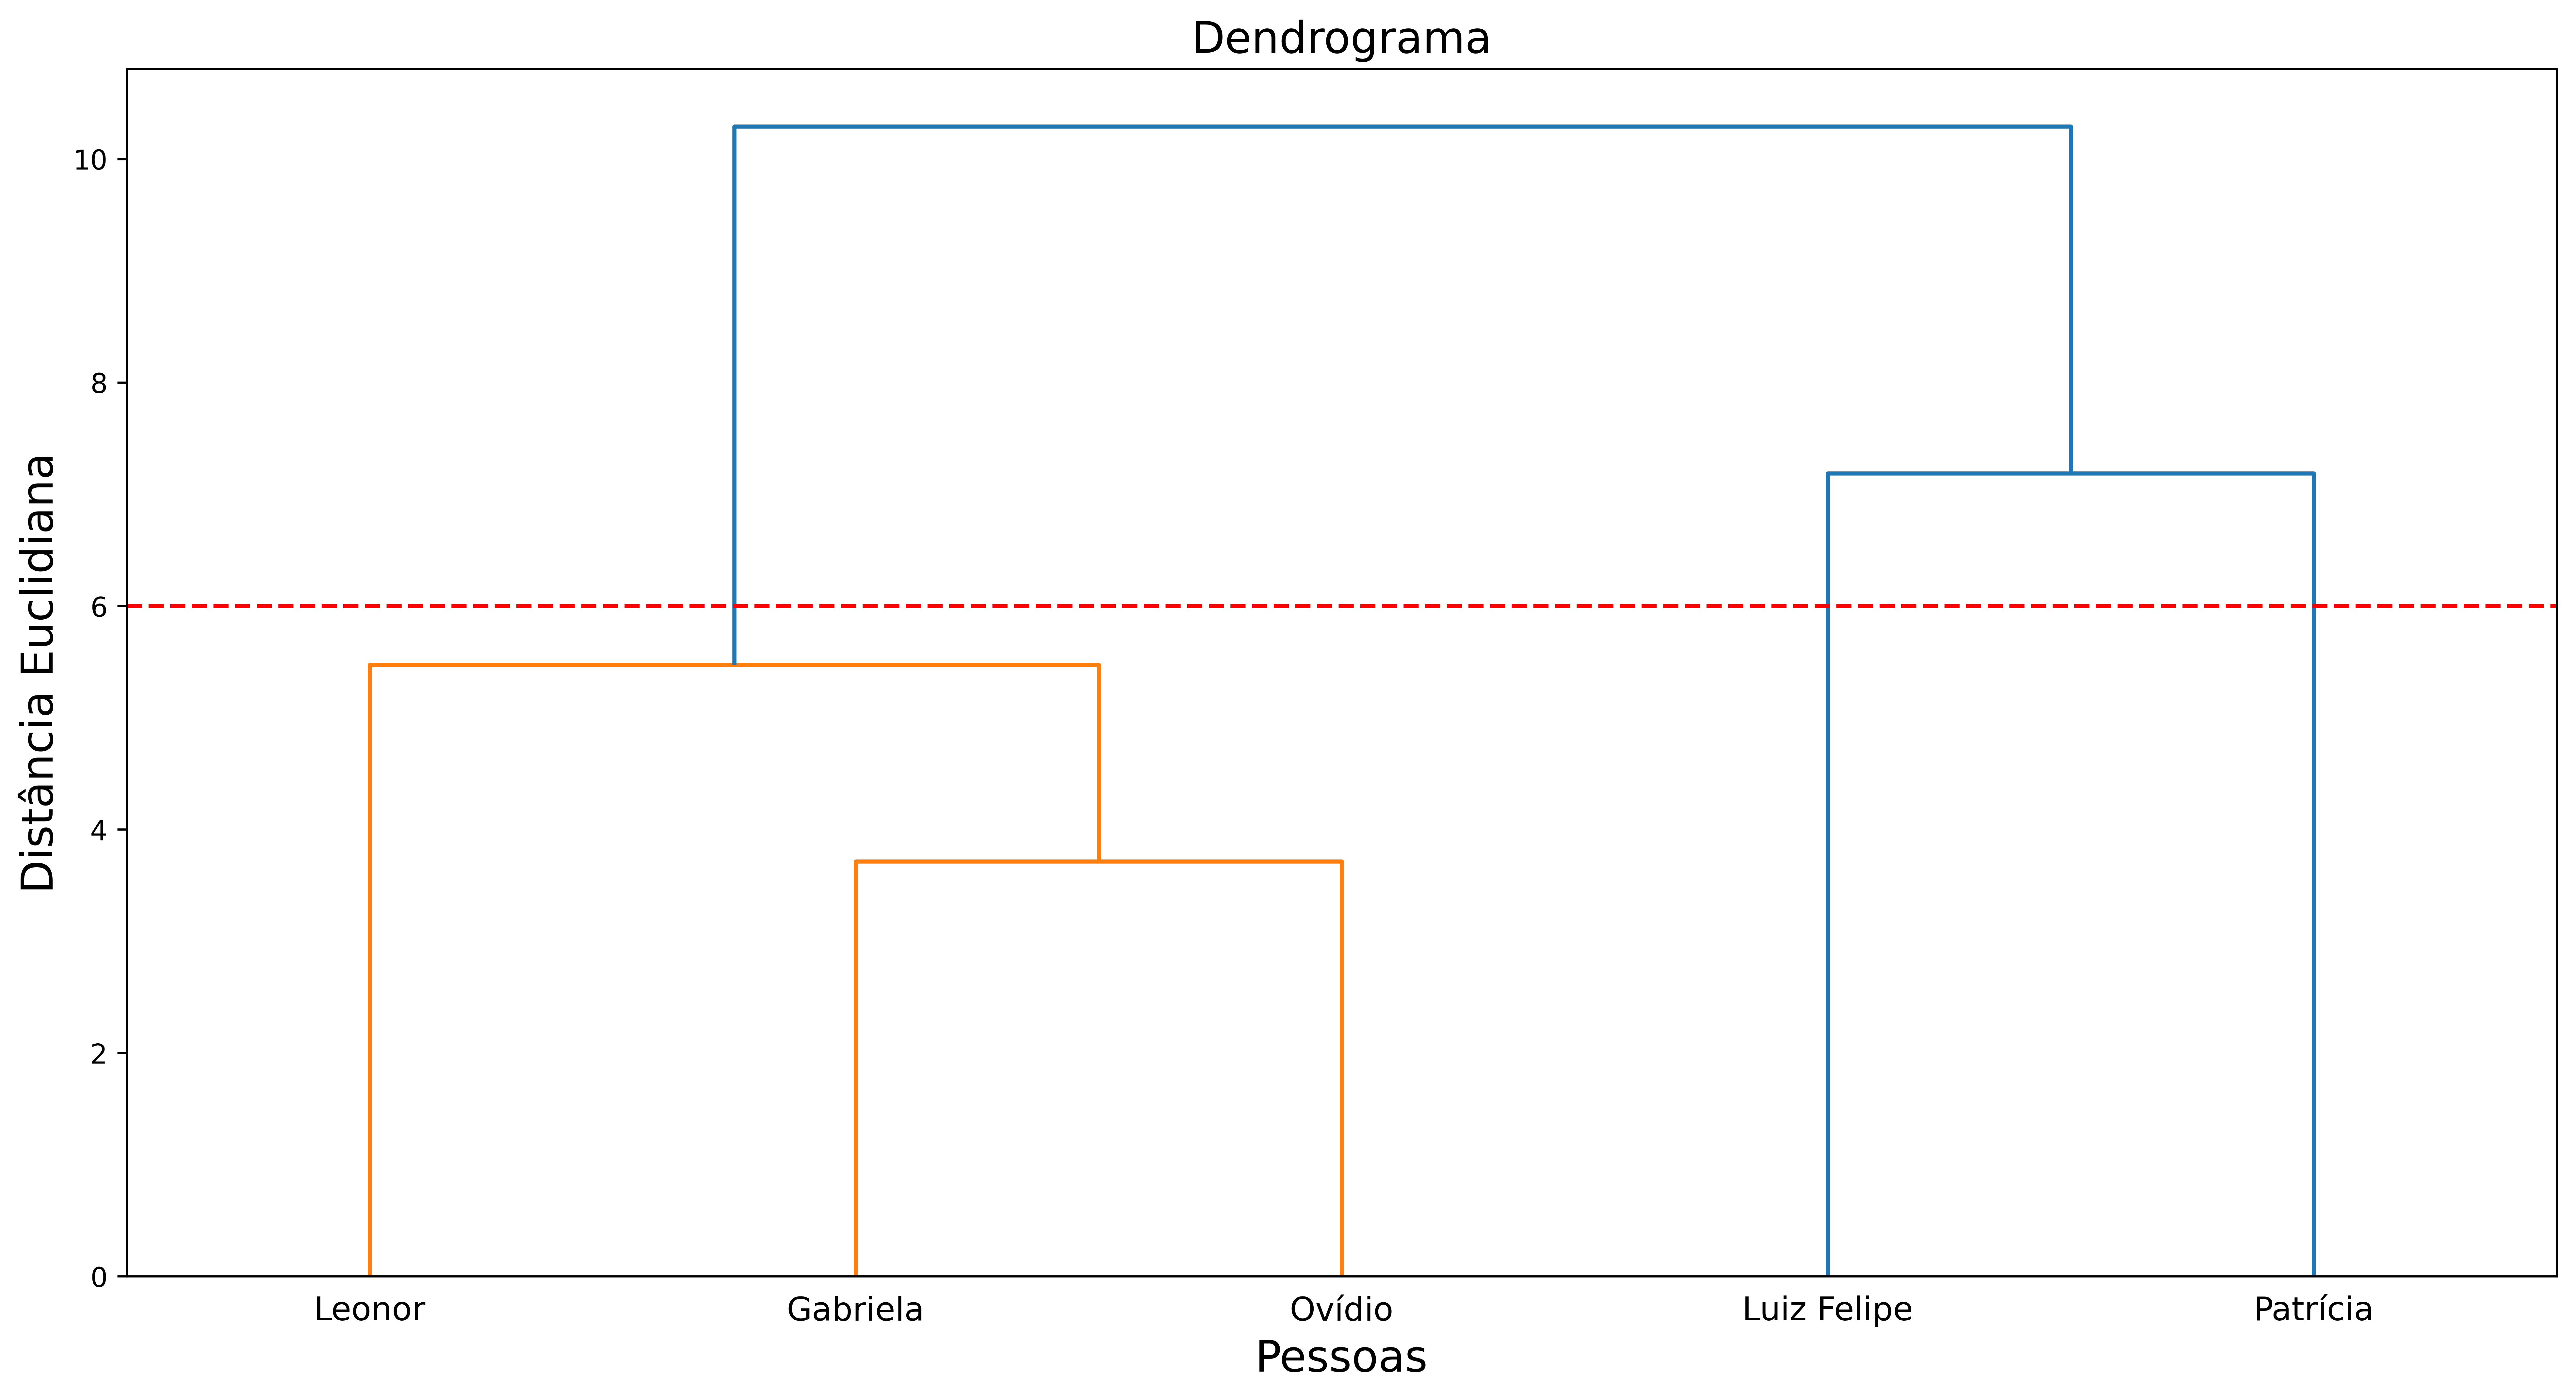

[3.713488925525428, 5.473572873361603, 7.1867934435323795, 10.290286682109492]


In [22]:
plt.figure(figsize=(16,8), dpi=600)
dend_compl = sch.linkage(vest, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(vest)
dados_vest['cluster_complete'] = indica_cluster_comp
dados_vest['cluster_complete'] = dados_vest['cluster_complete'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_c['dcoord']]
print(coef_complete)

#### Mostrando a Base "dados_vest" com o cluster "cluster_sing" e "cluster_comp"

In [23]:
dados_vest

,estudante,matemática,física,química,cluster_single,cluster_complete
0,Gabriela,3.7,2.7,9.1,0,0
1,Luiz Felipe,7.8,8.0,1.5,1,2
2,Patrícia,8.9,1.0,2.7,2,1
3,Ovídio,7.0,1.0,9.0,0,0
4,Leonor,3.4,2.0,5.0,0,0


### C - Gerando o dendrograma
### Distância euclidiana e método de encadeamento average linkage

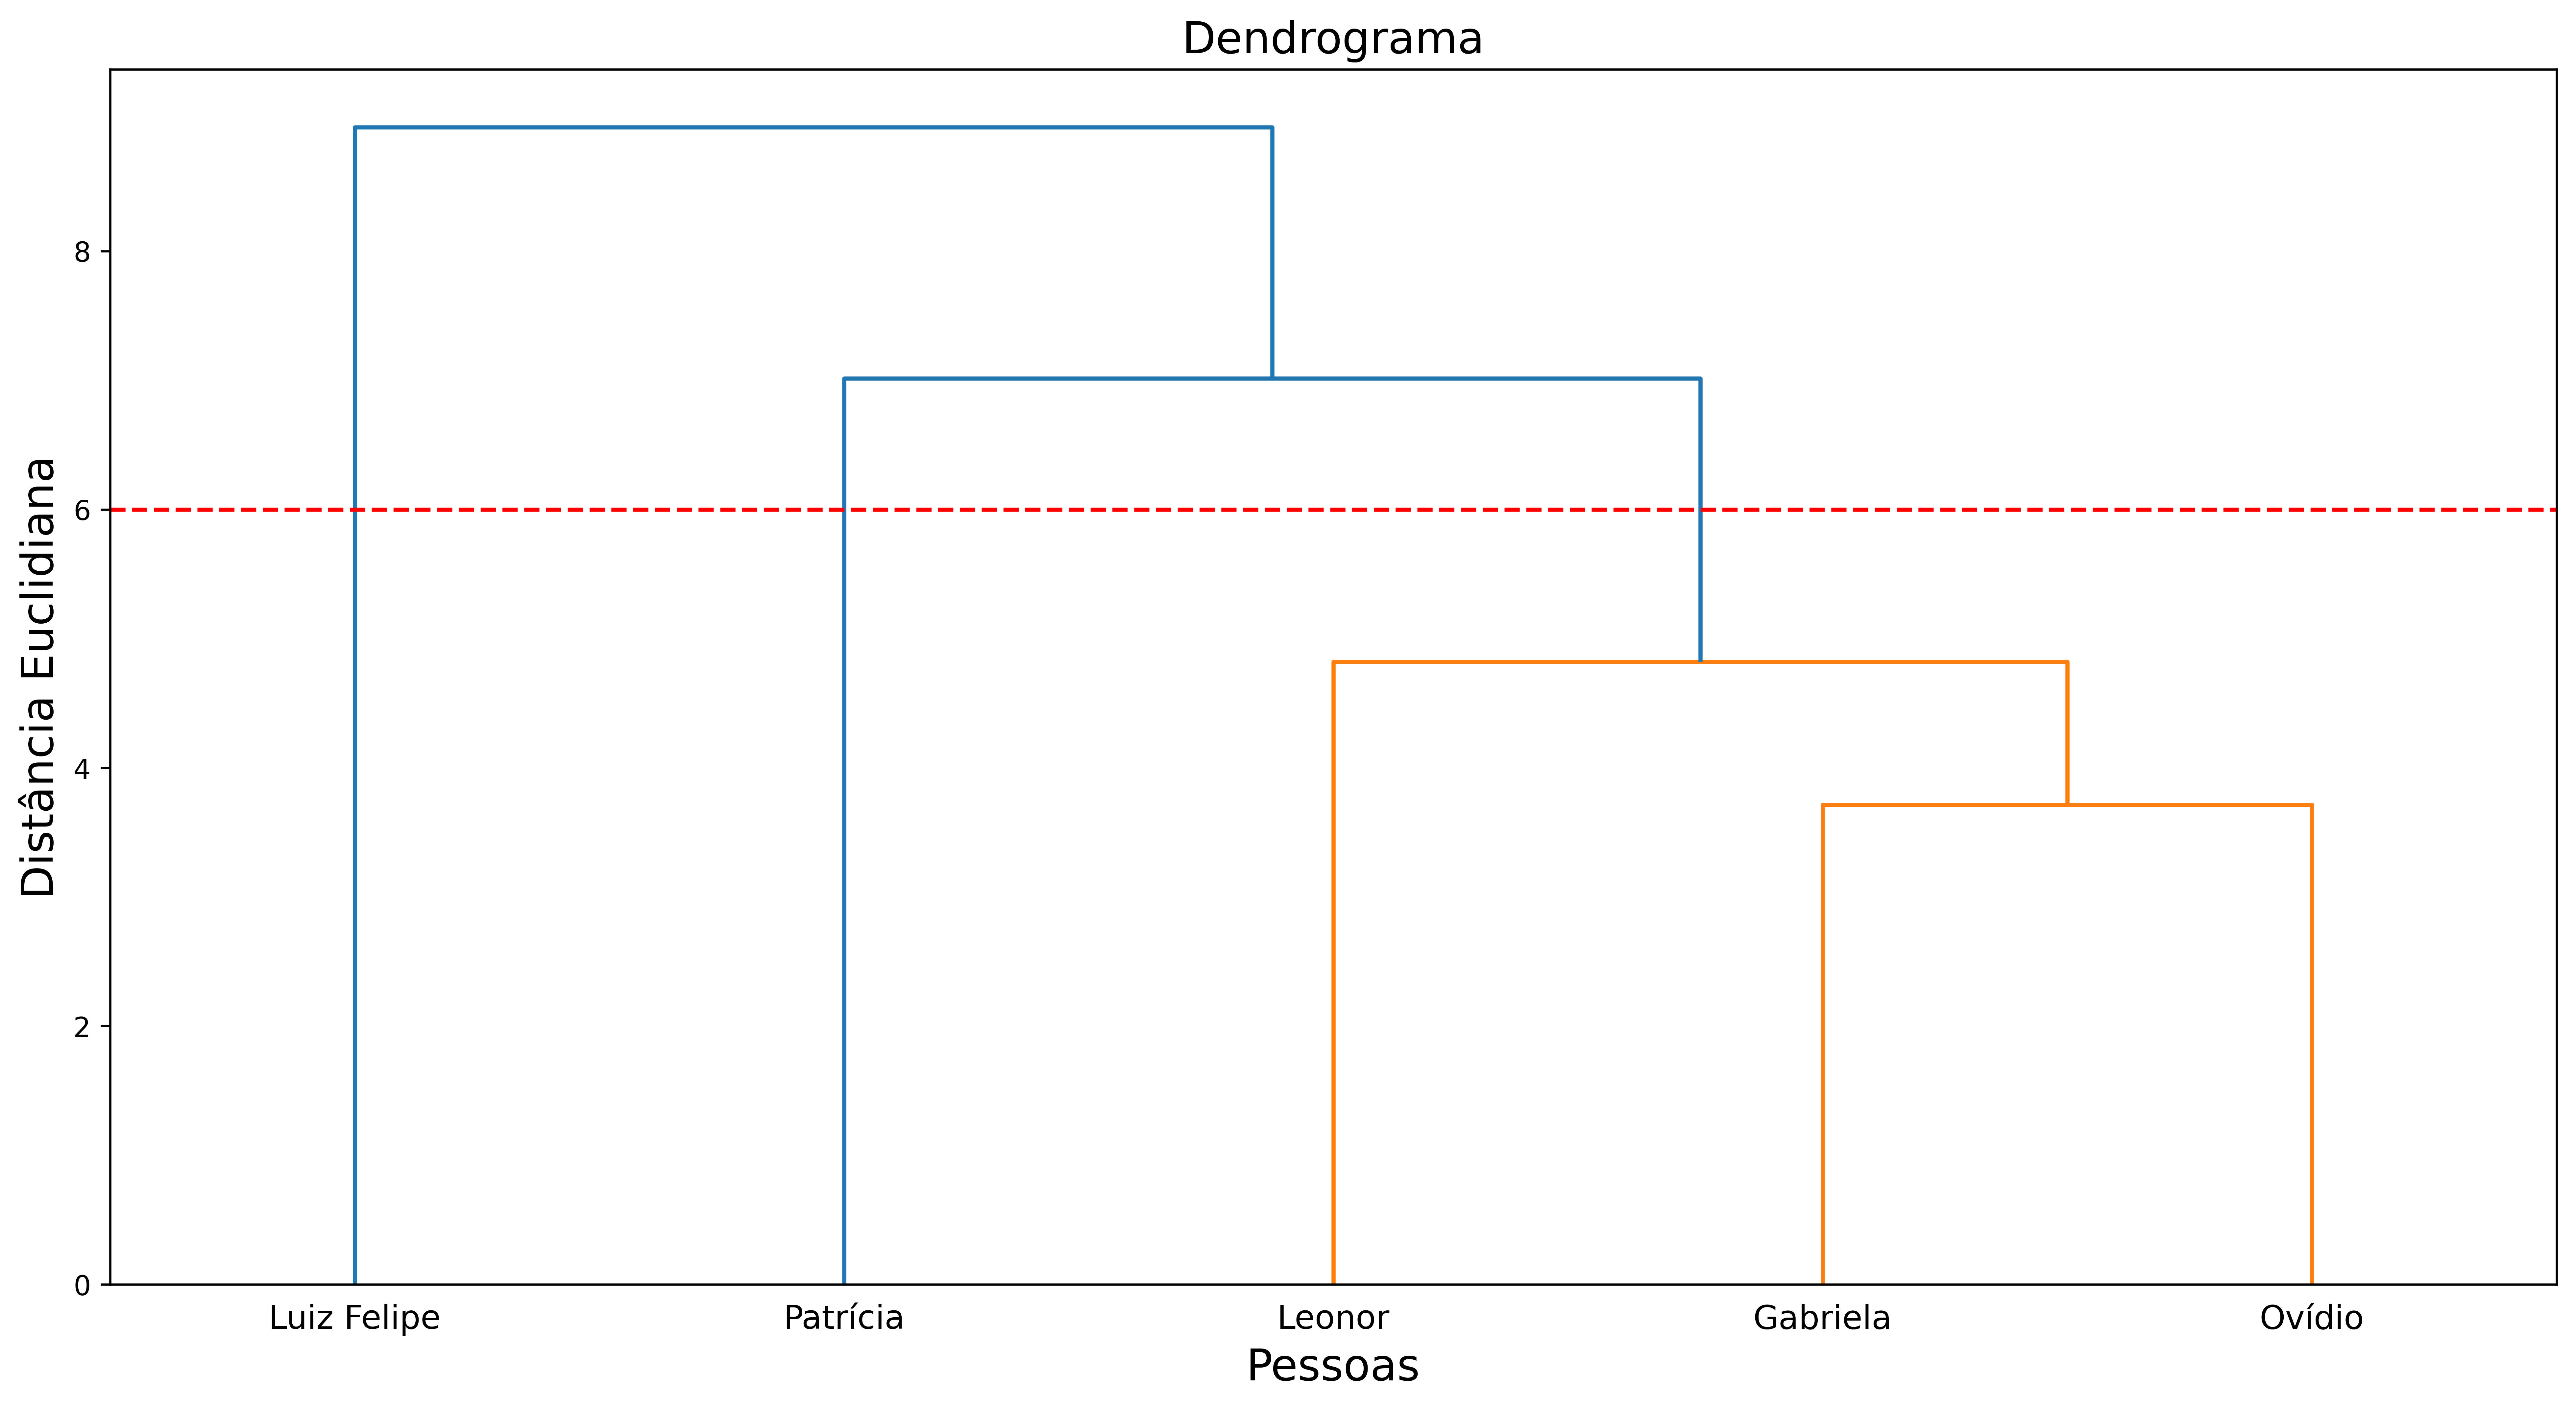

[3.713488925525428, 4.821852382880106, 7.014908666114838, 8.957934317775708]


In [24]:

plt.figure(figsize=(16,8), dpi=600)
dend_avg = sch.linkage(vest, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()

# Gerando a variável com a indicação do cluster no dataset

cluster_avg = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')
indica_cluster_avg = cluster_avg.fit_predict(vest)
dados_vest['cluster_average'] = indica_cluster_avg
dados_vest['cluster_average'] = dados_vest['cluster_average'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (average)
coef_avg = [y[1] for y in dendrogram_a['dcoord']]
print(coef_avg)

#### Mostrando a Base "dados_vest" com o cluster "cluster_sing" e "cluster_comp" e "cluster_avg"

In [25]:
dados_vest

,estudante,matemática,física,química,cluster_single,cluster_complete,cluster_average
0,Gabriela,3.7,2.7,9.1,0,0,0
1,Luiz Felipe,7.8,8.0,1.5,1,2,1
2,Patrícia,8.9,1.0,2.7,2,1,2
3,Ovídio,7.0,1.0,9.0,0,0,0
4,Leonor,3.4,2.0,5.0,0,0,0
